In [1]:
from scipy.stats import norm, uniform
from scipy.integrate import simpson
import numpy as np
import matplotlib.pyplot as plt

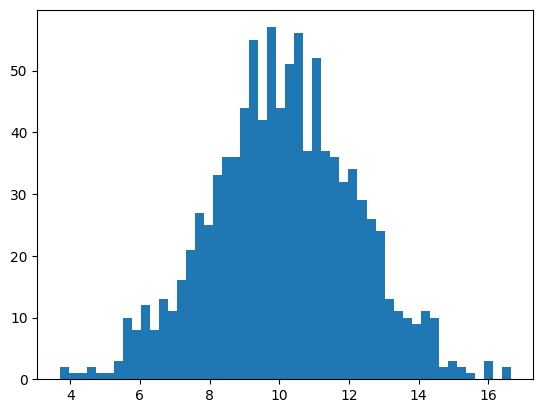

In [2]:
plt.hist(norm.rvs(loc=10, scale=2, size=1000), bins=50);

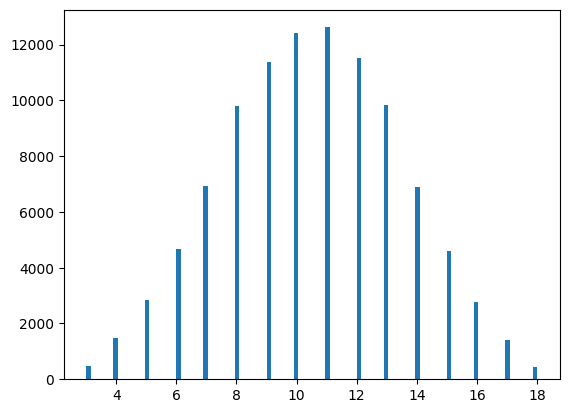

In [3]:
samples = np.ceil(uniform.rvs(loc=0, scale=6, size=(100000, 3))).sum(axis=1)
plt.hist(samples, bins=100);

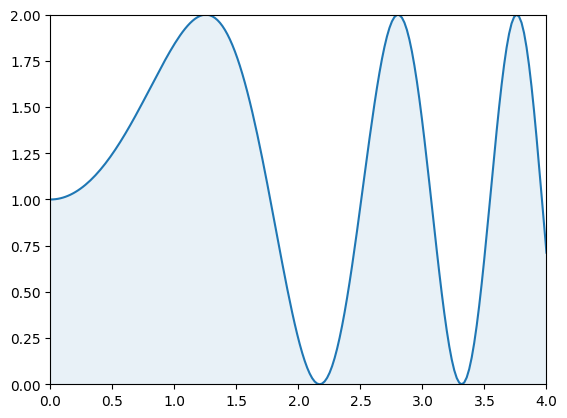

In [4]:
def pdf(x):
    return np.sin(x**2) + 1

xs = np.linspace(0, 4, 200)
ps = pdf(xs)
plt.plot(xs, ps)
plt.fill_between(xs, 0, ps, alpha=0.1)
plt.xlim(0, 4)
plt.ylim(0, 2);

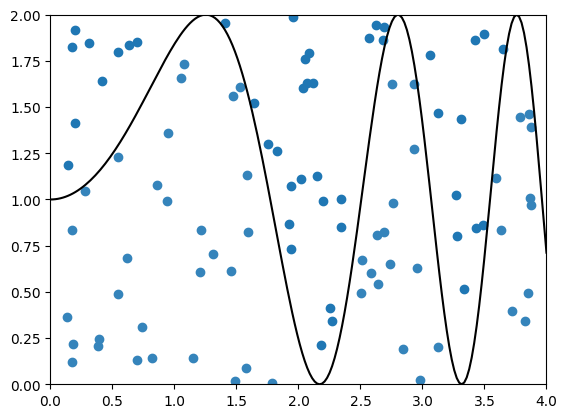

In [5]:
n = 100
random_x = uniform.rvs(loc=0, scale=4, size=n)
random_y = uniform.rvs(loc=0, scale=2, size=n)

plt.scatter(random_x, random_y)
plt.plot(xs, ps, c="k")
plt.fill_between(xs, 0, ps, color="w", alpha=0.1)
plt.xlim(0, 4), plt.ylim(0, 2);

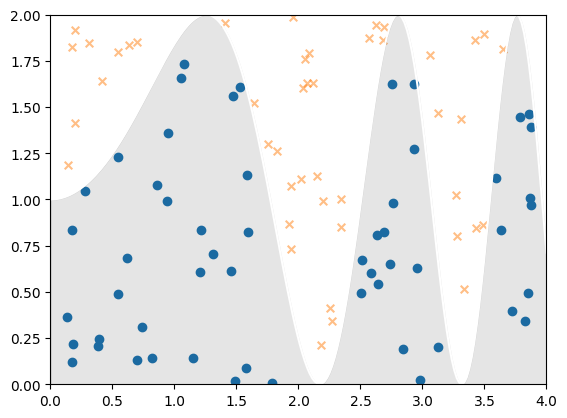

In [6]:
passed = random_y <= pdf(random_x)
plt.scatter(random_x[passed], random_y[passed])
plt.scatter(random_x[~passed], random_y[~passed], marker="x", s=30, alpha=0.5)
plt.plot(xs, ps, c="w")
plt.fill_between(xs, 0, ps, color="k", alpha=0.1)
plt.xlim(0, 4), plt.ylim(0, 2);

59337113


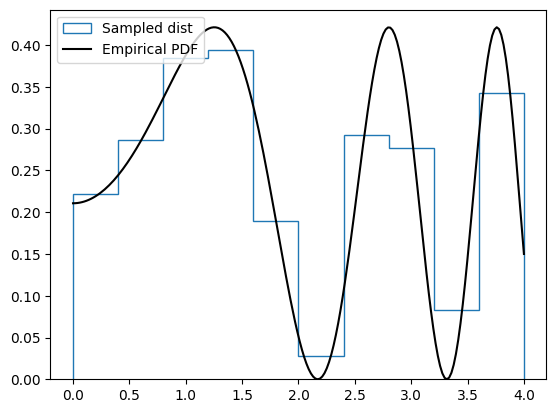

In [10]:
n2 = 100000000
x_test = uniform.rvs(scale=4, size=n2)
x_final = x_test[uniform.rvs(scale=2, size=n2) <= pdf(x_test)]
print(len(x_final))
plt.hist(x_final, density=True, histtype="step", label="Sampled dist")
plt.plot(xs, ps / simpson(ps, x=xs), c="k", label="Empirical PDF")
plt.legend(loc=2);

In [11]:
def pdf(x):
    return 3 * x**2
def cdf(x):
    return x**3
def icdf(cdf):
    return cdf**(1/3)

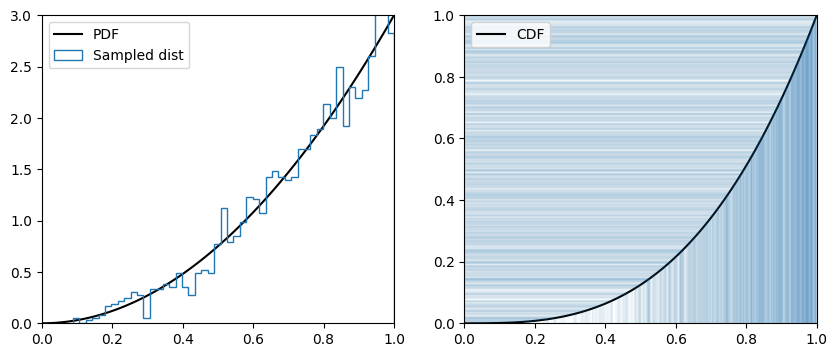

In [12]:
xs = np.linspace(0, 1, 100)
pdfs = pdf(xs)
cdfs = cdf(xs)
n = 2000
u_samps = uniform.rvs(size=n)
x_samps = icdf(u_samps)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
axes[0].plot(xs, pdfs, color="k", label="PDF")
axes[0].hist(x_samps, density=True, histtype="step", label="Sampled dist", bins=50)
axes[1].plot(xs, cdfs, color="k", label="CDF")
axes[1].hlines(u_samps, 0, x_samps, linewidth=0.1, alpha=0.3)
axes[1].vlines(x_samps, 0, u_samps, linewidth=0.1, alpha=0.3)
axes[0].legend(), axes[1].legend()
axes[1].set_xlim(0, 1), axes[1].set_ylim(0, 1);
axes[0].set_xlim(0, 1), axes[0].set_ylim(0, 3);

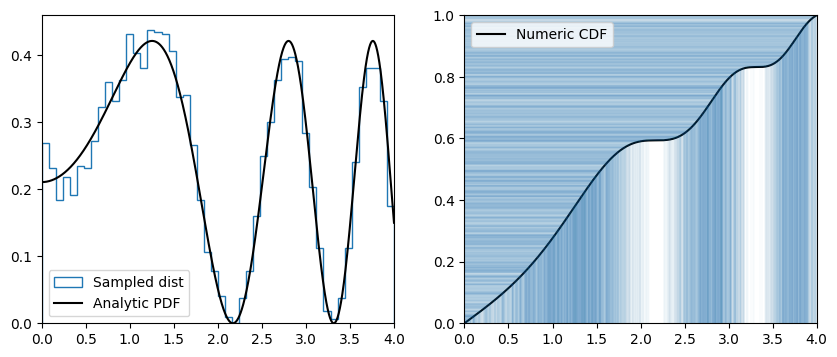

In [13]:
from scipy.interpolate import interp1d

def pdf(x):
    return np.sin(x**2) + 1
xs = np.linspace(0, 4, 10000)
pdfs = pdf(xs)
cdfs = pdfs.cumsum() / pdfs.sum()  # Dangerous

u_samps = uniform.rvs(size=4000)
x_samps = interp1d(cdfs, xs)(u_samps)

fig, axes = plt.subplots(ncols=2, figsize=(10,4))
axes[0].hist(x_samps, density=True, histtype="step", label="Sampled dist", bins=50)
axes[0].plot(xs, pdfs/4.747, color="k", label="Analytic PDF")
axes[0].legend(loc=3), axes[0].set_xlim(0, 4)
axes[1].plot(xs, cdfs, color="k", label="Numeric CDF")
axes[1].hlines(u_samps, 0, x_samps, linewidth=0.1, alpha=0.3)
axes[1].vlines(x_samps, 0, u_samps, linewidth=0.1, alpha=0.3)
axes[1].legend(loc=2), axes[1].set_xlim(0, 4), axes[1].set_ylim(0, 1);